#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [2]:
# SP500 complete
start=datetime.datetime(1995, 1, 1)
end=datetime.datetime(2021, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [3]:
print(SP500.index)

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)


In [4]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [5]:
print(sectors)

{'Real Estate', 'Energy', 'Financials', 'Industrials', 'Consumer Staples', 'Health Care', 'Utilities', 'Communication Services', 'Materials', 'Consumer Discretionary', 'Information Technology'}


In [6]:
def SectorPrices(sec,df, start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [7]:
SectorPrices("Real Estate", df,start, end)

Date
1995-01-03      71.326287
1995-01-04      71.497547
1995-01-05      71.538377
1995-01-06      71.322947
1995-01-09      71.496329
                 ...     
2020-12-24    1307.739215
2020-12-28    1320.167455
2020-12-29    1303.770272
2020-12-30    1315.966423
2020-12-31    1329.620779
Name: Close, Length: 6547, dtype: float64

In [8]:
def SectorPrices(sec, df,start, end):
    # takes the name of a sector and returns the aggregated data of all companies from start to end
    # which have full data for this time period
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
        
        # only add stocks o sector data which have full history
        if len(StockData.index) == len(SP500.index):
            Output = Output.add(StockData)
    
    return(Output)

In [9]:
Seclist = list()


In [10]:
SectorsDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    SectorsDF[s] = SectorPrices(s, df,start, end)
    

Real Estate
Energy
Financials
- BRK.B: No data found, symbol may be delisted
Industrials
Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
Health Care
- OGN: Data doesn't exist for startDate = 788914800, endDate = 1609455600
Utilities
Communication Services
- FOXA: CircuitBreaker 'redis' is OPEN and does not permit further calls
- LUMN: CircuitBreaker 'redis' is OPEN and does not permit further calls
- OMC: CircuitBreaker 'redis' is OPEN and does not permit further calls
- DIS: CircuitBreaker 'redis' is OPEN and does not permit further calls
Materials
- AMCR: CircuitBreaker 'redis' is OPEN and does not permit further calls
- AVY: CircuitBreaker 'redis' is OPEN and does not permit further calls
- CE: CircuitBreaker 'redis' is OPEN and does not permit further calls
- CTVA: CircuitBreaker 'redis' is OPEN and does not permit further calls
- LYB: CircuitBreaker 'redis' is OPEN and does not permit further calls
- SEE: Error occurred while retrieving timeserie

In [11]:
print(SectorsDF)

            Real Estate      Energy   Financials  Industrials  \
Date                                                            
1995-01-03    71.326285   82.377879   422.520404   328.068918   
1995-01-04    71.497545   82.752745   421.681777   328.356827   
1995-01-05    71.538372   82.424187   421.635527   329.237605   
1995-01-06    71.322939   81.928108   422.265513   330.572942   
1995-01-09    71.496337   81.672653   422.439078   329.952173   
...                 ...         ...          ...          ...   
2020-12-24  1307.739249  498.033423  3881.876208  7838.503895   
2020-12-28  1320.167495  493.322158  3893.463563  7852.197010   
2020-12-29  1303.770253  490.629481  3878.364793  7791.955969   
2020-12-30  1315.966429  500.503061  3910.681495  7841.481813   
2020-12-31  1329.620756  495.638862  3963.974323  7896.543056   

            Consumer Staples  Health Care    Utilities  \
Date                                                     
1995-01-03        154.667040   252.536

In [12]:
SectorsDF.index

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=6547, freq=None)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

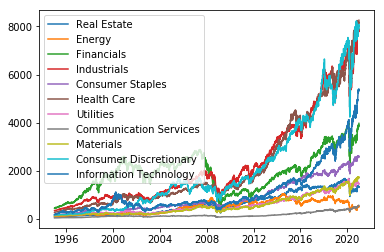

In [13]:
for i in SectorsDF.columns:
    plt.plot(SectorsDF.index,SectorsDF[i], label = i)
plt.legend()
plt.show()

## Some Data Analysis

In [14]:
Corr = SectorsDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.8953809641328584 Real Estate
0.6827960416532548 Energy
0.7014573950169739 Financials
0.9323211559529541 Industrials
0.9268287100086202 Consumer Staples
0.9245290479848932 Health Care
0.9278681787765163 Utilities
0.9083977401565295 Communication Services
0.931044502201252 Materials
0.9264748214998189 Consumer Discretionary
0.8949857742429697 Information Technology


,Real Estate,Energy,Financials,Industrials,Consumer Staples,Health Care,Utilities,Communication Services,Materials,Consumer Discretionary,Information Technology
Real Estate,1.000000,0.837169,0.612228,0.944046,0.962984,0.927662,0.961197,0.866708,0.954337,0.937854,0.845006
Energy,0.837169,1.000000,0.382736,0.705057,0.716360,0.655183,0.720934,0.562327,0.726181,0.666721,0.538089
Financials,0.612228,0.382736,1.000000,0.714916,0.674960,0.702831,0.688716,0.800059,0.691874,0.712816,0.734896
Industrials,0.944046,0.705057,0.714916,1.000000,0.988301,0.991078,0.988340,0.970495,0.995805,0.991377,0.966118
Consumer Staples,0.962984,0.716360,0.674960,0.988301,1.000000,0.988778,0.989987,0.954557,0.990872,0.985907,0.942412
Health Care,0.927662,0.655183,0.702831,0.991078,0.988778,1.000000,0.981672,0.975412,0.987402,0.987624,0.972178
Utilities,0.961197,0.720934,0.688716,0.988340,0.989987,0.981672,1.000000,0.952444,0.990748,0.984738,0.947774
Communication Services,0.866708,0.562327,0.800059,0.970495,0.954557,0.975412,0.952444,1.000000,0.960102,0.970015,0.980255
Materials,0.954337,0.726181,0.691874,0.995805,0.990872,0.987402,0.990748,0.960102,1.000000,0.990112,0.954058
Consumer Discretionary,0.937854,0.666721,0.712816,0.991377,0.985907,0.987624,0.984738,0.970015,0.990112,1.000000,0.964058


In [15]:
pca = PCA()
pca.fit(Corr)

PCA()

In [16]:
print(pca.explained_variance_ratio_[0])

0.6733345899649927


In [17]:
pca.components_

array([[-0.21487998,  0.08444878, -0.08190435, -0.32116831, -0.32645583,
        -0.35891265, -0.31571592, -0.35465949, -0.3154547 , -0.34526232,
        -0.39657063],
       [-0.32484469, -0.66525225,  0.59279803, -0.06241801, -0.12816964,
        -0.02728189, -0.1163804 ,  0.17854084, -0.11091624, -0.03391096,
         0.14340331],
       [-0.40818533, -0.3552475 , -0.7501167 ,  0.02045109, -0.08425015,
         0.08462907, -0.08605207,  0.03737784, -0.0101944 , -0.03051343,
         0.34640067],
       [-0.54091352,  0.59408202,  0.20549214,  0.22642723, -0.26096595,
        -0.04373406, -0.15127203,  0.20631865,  0.19123171, -0.0672666 ,
         0.29055455],
       [ 0.10522277, -0.05262583,  0.05633689,  0.04304432, -0.38893573,
        -0.44296152,  0.48586449, -0.44543427,  0.05955828,  0.2054    ,
         0.39170624],
       [-0.01111144, -0.06256394, -0.03589407,  0.12384885, -0.12873181,
        -0.11081777, -0.50395662, -0.11231128,  0.16464633,  0.7838832 ,
        -0.205

## Interval-wise

In [18]:
Period = 40 # 2 trading months

T = int(len(SectorsDF)/Period)


for t in range(T):
    IntervalDF = SectorsDF.iloc[(0+t*Period):(Period+t*Period)]
    IntervalCorr = IntervalDF.corr()
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.7774873227661924 0
0.6904625254949022 1
0.8223504265822067 2
0.6514910526460683 3
0.8157009492906442 4
0.9514469257567741 5
0.5453411573892942 6
0.8723605956225313 7
0.5355895442429036 8
0.8464141112687658 9
0.5886818977506308 10
0.915290788740439 11
0.6261191854803361 12
0.863800762088373 13
0.8809060089829258 14
0.8523361194310554 15
0.7632893430664245 16
0.8040210557167963 17
0.8126199841827204 18
0.9409745148799703 19
0.7289580357722186 20
0.9080532674610553 21
0.5785231329963416 22
0.7478166505703576 23
0.9460680951922295 24
0.7964305557708257 25
0.6141732118767149 26
0.7641599485612321 27
0.7711676607069329 28
0.8423803305633222 29
0.8316720984436021 30
0.8887244361567638 31
0.8834808310103751 32
0.8496499975587921 33
0.7259184170402989 34
0.7190258319046722 35
0.8364574650406116 36
0.5905787009347349 37
0.6970847113393177 38
0.7737622802297963 39
0.787124443006264 40
0.7178078123165812 41
0.6354889931330705 42
0.9301500092169003 43
0.8795800181397357 44
0.7959894704489808 45
0

In [19]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(SectorsDF) - Period)/Shift)

CorrMatrices = np.empty((T, 121))


for t in range(T):
    print((0+t*Shift),(Period+t*Shift))
    IntervalDF = SectorsDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = IntervalCorr.to_numpy().reshape(1,-1)
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0 40
0.7774873227661924 0
10 50
0.764790748430802 1
20 60
0.9496179990148881 2
30 70
0.9134692270422626 3
40 80
0.6904625254949022 4
50 90
0.5522228630892536 5
60 100
0.8308717906624792 6
70 110
0.6921525103678182 7
80 120
0.8223504265822067 8
90 130
0.8799433103753105 9
100 140
0.8574081404681922 10
110 150
0.7701095489410239 11
120 160
0.6514910526460683 12
130 170
0.8056027087005907 13
140 180
0.8718811341879991 14
150 190
0.6403002631521616 15
160 200
0.8157009492906442 16
170 210
0.9324171947113742 17
180 220
0.6381704922782007 18
190 230
0.8070904740909534 19
200 240
0.9514469257567741 20
210 250
0.9522623963721517 21
220 260
0.8682156317757113 22
230 270
0.7865865871972034 23
240 280
0.5453411573892942 24
250 290
0.6424895413074476 25
260 300
0.8933532574686914 26
270 310
0.8704139882582691 27
280 320
0.8723605956225313 28
290 330
0.8056268315972721 29
300 340
0.8875452839753257 30
310 350
0.8764674434290247 31
320 360
0.5355895442429036 32
330 370
0.73588241501389 33
340 380
0.

0.8031123282867592 276
2770 2810
0.5683414586461605 277
2780 2820
0.8865187340605863 278
2790 2830
0.8577882883145317 279
2800 2840
0.588671133828908 280
2810 2850
0.9056512572162474 281
2820 2860
0.7109382048635265 282
2830 2870
0.7549217070674625 283
2840 2880
0.9277974094946025 284
2850 2890
0.943415948526445 285
2860 2900
0.8798151210465665 286
2870 2910
0.8682977873696373 287
2880 2920
0.8651188701185855 288
2890 2930
0.8515164377542076 289
2900 2940
0.7659307630266288 290
2910 2950
0.9399715510186412 291
2920 2960
0.9528766225592127 292
2930 2970
0.9149374554290426 293
2940 2980
0.6590441555152977 294
2950 2990
0.5894252873095964 295
2960 3000
0.4653341354790264 296
2970 3010
0.5353913265928152 297
2980 3020
0.7586250233761505 298
2990 3030
0.6888314130039525 299
3000 3040
0.7386340721244025 300
3010 3050
0.7729686050326888 301
3020 3060
0.8005106265418381 302
3030 3070
0.8045512125646399 303
3040 3080
0.8505899274576066 304
3050 3090
0.846155358385575 305
3060 3100
0.81756320014

0.8250044289600278 589
5900 5940
0.6872433133036372 590
5910 5950
0.7816838676523229 591
5920 5960
0.8908385674272693 592
5930 5970
0.8334896665530925 593
5940 5980
0.6859399624294964 594
5950 5990
0.5648582471691317 595
5960 6000
0.8922394188577769 596
5970 6010
0.9224496917971838 597
5980 6020
0.8967026960109238 598
5990 6030
0.7946175999280275 599
6000 6040
0.8087543028970812 600
6010 6050
0.693396299459125 601
6020 6060
0.7631304675465772 602
6030 6070
0.8262506714620976 603
6040 6080
0.5889848348156476 604
6050 6090
0.5486624353207169 605
6060 6100
0.772900940044237 606
6070 6110
0.8126214954778939 607
6080 6120
0.8111309219585774 608
6090 6130
0.8841403765393685 609
6100 6140
0.593708447517165 610
6110 6150
0.763954902559548 611
6120 6160
0.8099968080612597 612
6130 6170
0.7552238155834313 613
6140 6180
0.5393921357966474 614
6150 6190
0.5887222191900626 615
6160 6200
0.7419754595152122 616
6170 6210
0.937400053563938 617
6180 6220
0.8979460644226187 618
6190 6230
0.7780904178851


for t in range(T):
    print((0+t*Shift),(Period+t*Shift), SectorsDF.index[int(0.5*Period)+t*Shift])

In [20]:
print(CorrMatrices)
print(CorrMatrices.shape)

[[1.         0.44807502 0.25711645 ... 0.83651507 0.82522958 1.        ]
 [1.         0.77454966 0.76470165 ... 0.71917596 0.60198982 1.        ]
 [1.         0.83375246 0.72157596 ... 0.86902231 0.27363248 1.        ]
 ...
 [1.         0.39121162 0.68346544 ... 0.74209921 0.6207108  1.        ]
 [1.         0.92944911 0.93770018 ... 0.81108122 0.40327315 1.        ]
 [1.         0.89546851 0.96014791 ... 0.86400074 0.09129787 1.        ]]
(650, 121)


In [21]:
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
print(X.shape)

(6, 2)


In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(CorrMatrices)

In [23]:
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))

650


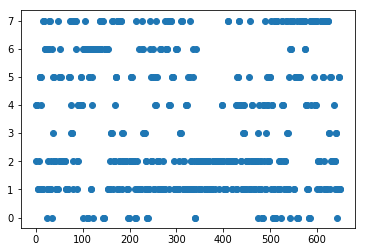

In [24]:
plt.scatter(np.arange(len(ClusterPred)), ClusterPred)
plt.show()

# That does not look like the original publication...